In [1]:
n = 12
N = (n + 4) % 5 + 1
print(f"Номер варіанту: {N}")

Номер варіанту: 2


In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
print(df.columns)

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')


In [3]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
print(df.describe())

                 Id          Year         Count
count  1.825433e+06  1.825433e+06  1.825433e+06
mean   9.127170e+05  1.972620e+03  1.846879e+02
std    5.269573e+05  3.352891e+01  1.566711e+03
min    1.000000e+00  1.880000e+03  5.000000e+00
25%    4.563590e+05  1.949000e+03  7.000000e+00
50%    9.127170e+05  1.982000e+03  1.200000e+01
75%    1.369075e+06  2.001000e+03  3.200000e+01
max    1.825433e+06  2.014000e+03  9.968000e+04


In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
print(df['Name'].nunique())

93889


In [5]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
pop = df.loc[df['Count'].idxmax()]
print(f"The name is '{pop['Name']}' in {pop['Year']}")

The name is 'Linda' in 1947


In [6]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
min = df[df['Count'] == df['Count'].min()].shape[0]
print(min)

254615


In [7]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
unique_names_per_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_per_year.idxmax()
max_unique_names = unique_names_per_year.max()
result_table = pd.DataFrame({
    'Year': [year_with_most_unique_names],
    'Name': [max_unique_names]
})
print(result_table.to_string(index=False))

 Year  Name
 2008 32488


In [8]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
unique_names_per_year = df.groupby('Year')['Name'].nunique()
year_with_most_unique_names = unique_names_per_year.idxmax()
data_for_year = df[df['Year'] == year_with_most_unique_names]
most_popular_name = data_for_year.loc[data_for_year['Count'].idxmax()]
print(f"'{most_popular_name['Name']}'")

'Jacob'


In [9]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
jacob_female = df[(df['Name'] == 'Jacob') & (df['Gender'] == 'F')]
most_popular_year = jacob_female.loc[jacob_female['Count'].idxmax()]
result_table = pd.DataFrame([most_popular_year]).set_index('Id')
print(result_table.to_string())

          Name  Year Gender  Count
Id                                
1455557  Jacob  2004      F    171


In [10]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
neutral_names = df.groupby(['Year', 'Name', 'Gender'])['Count'].sum().unstack(fill_value=0)
neutral_names['Gender_neutral'] = (neutral_names['F'] > 0) & (neutral_names['M'] > 0)
gender_neutral_counts = neutral_names[neutral_names['Gender_neutral']].groupby('Year').size()
year_with_max_neutral_names = gender_neutral_counts.idxmax()
max_neutral_names = gender_neutral_counts.max()
result_table = pd.DataFrame({
    'Gender_neutral_names': [max_neutral_names]
}, index=[year_with_max_neutral_names])
result_table.index.name = 'Year'
print(result_table.to_string())

      Gender_neutral_names
Year                      
2008                  2557


In [11]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
births_per_year = df.groupby('Year')['Count'].sum()
year_with_most_births = births_per_year.idxmax()
print(year_with_most_births)

1957


In [12]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
births_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
print(births_by_year_gender.head())

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [13]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
births_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_with_more_girls = (births_by_year_gender['F'] > births_by_year_gender['M']).sum()
print(years_with_more_girls)

54


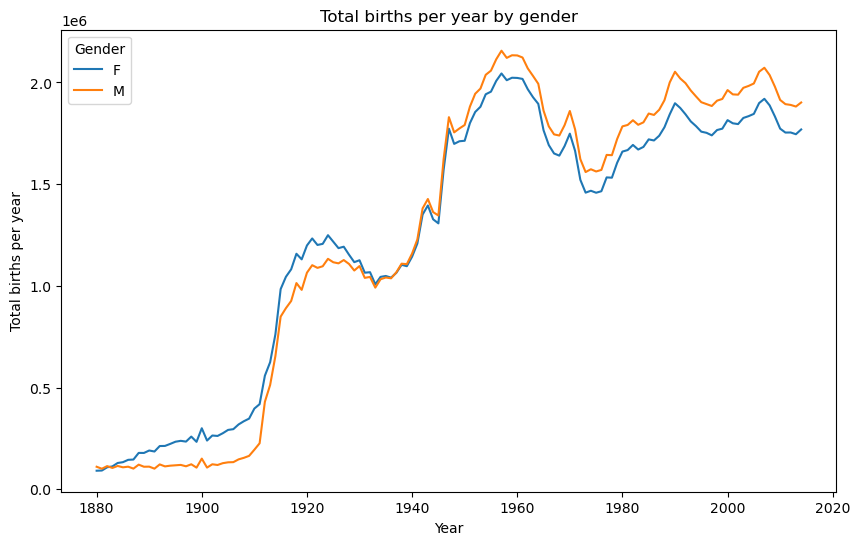

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
births_by_year_gender = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
plt.figure(figsize=(10, 6))
plt.plot(births_by_year_gender.index, births_by_year_gender['F'], label='F', linestyle='-', marker='')
plt.plot(births_by_year_gender.index, births_by_year_gender['M'], label='M', linestyle='-', marker='')
plt.title('Total births per year by gender')
plt.xlabel('Year')
plt.ylabel('Total births per year')
plt.legend(title='Gender')
plt.grid(False)
plt.show()

In [15]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
neutral_names = df.groupby(['Name', 'Gender'])['Count'].sum().unstack(fill_value=0)
neutral_names_count = neutral_names[(neutral_names['F'] > 0) & (neutral_names['M'] > 0)].shape[0]
print(neutral_names_count)


10221


In [16]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
years_observed = df['Year'].nunique()
result = f"Спостереження проводилось {years_observed} років"
print(result)


Спостереження проводилось 135 років


In [17]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
total_years = df['Year'].nunique()
names_per_year = df.groupby('Name')['Year'].nunique()
neutral_names_all_years = names_per_year[names_per_year == total_years].index
neutral_names_list = pd.DataFrame(neutral_names_all_years, columns=["Name"])
print(neutral_names_list)

        Name
0      Aaron
1      Abbie
2        Abe
3       Abel
4    Abigail
..       ...
922   Winnie
923   Winona
924    Wyatt
925     Zack
926      Zoe

[927 rows x 1 columns]


In [18]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
name_counts = df.groupby('Name')['Count'].sum()
threshold = 10000
unpopular_names = name_counts[name_counts < threshold]
most_popular_unpopular_name = unpopular_names.idxmax()
most_popular_unpopular_count = unpopular_names.max()
print(f"Наиболее популярное из непопулярных имён - это {most_popular_unpopular_name}. Им называли {most_popular_unpopular_count} раз.")

Наиболее популярное из непопулярных имён - это Kenton. Им называли 9997 раз.


In [19]:
import pandas as pd
df = pd.read_csv('C:/Users/Home/OneDrive/Рабочий стол/Python/Лаб 2/NationalNames.csv')
most_popular_names = df.loc[df.groupby('Year')['Count'].idxmax()]
result_table = most_popular_names[['Year', 'Name', 'Count']].set_index('Year')
print(result_table)

          Name  Count
Year                 
1880      John   9655
1881      John   8769
1882      John   9557
1883      John   8894
1884      John   9388
...        ...    ...
2010  Isabella  22883
2011    Sophia  21816
2012    Sophia  22267
2013    Sophia  21147
2014      Emma  20799

[135 rows x 2 columns]
